<a href="https://colab.research.google.com/github/shreyas36/loan-defaulters-prediction/blob/main/loan_defaulters_preditcion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport
from pycaret import classification
from sklearn.metrics import classification_report
import time
from itertools import combinations,permutations
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
traindf = pd.read_csv('train.csv')
testdf=pd.read_csv('test.csv')

In [ ]:
strcols=['Batch Enrolled','Grade','Sub Grade','Employment Duration',
         'Verification Status','Loan Title','Application Type','Initial List Status']
useless=['Accounts Delinquent','Payment Plan']
high_cardinality = ['Loan Title','Batch Enrolled']
ordinal = {'Grade':['G', 'F', 'E', 'D', 'C', 'B', 'A'],'Sub Grade':['G5', 'G4', 'G3', 'G2', 'G1', 'F5', 'F4', 'F3', 'F2', 'F1', 'E5',
       'E4', 'E3', 'E2', 'E1', 'D5', 'D4', 'D3', 'D2', 'D1', 'C5', 'C4',
       'C3', 'C2', 'C1', 'B5', 'B4', 'B3', 'B2', 'B1', 'A5', 'A4', 'A3',
       'A2', 'A1'],'Verification Status':['Not Verified', 'Source Verified', 'Verified'] }
categorical= ['Application Type','Employment Duration','Initial List Status','Batch Enrolled','Loan Title']

In [ ]:
from collections import defaultdict

In [ ]:
di = defaultdict(LabelEncoder)
def prepare(df):
    df=df.drop(columns=useless)
    for col in strcols:
        df[col] = di[col].fit_transform(df[col])
    return df

In [ ]:
traindf=prepare(traindf)

In [ ]:
X = traindf.iloc[:,:-1]
y = traindf.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [ ]:
SMOTE1 = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE1.fit_resample(X_train, y_train)

In [ ]:
X_train_SMOTE['Loan Status']=y_train_SMOTE
X_train_SMOTE=X_train_SMOTE.sample(frac = 1)

In [ ]:
for col in ordinal:
    X_train_SMOTE[col] = di[col].inverse_transform(X_train_SMOTE[col])

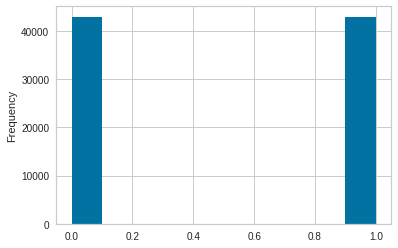

In [ ]:
X_train_SMOTE['Loan Status'].plot(kind='hist')

In [ ]:
X_train_SMOTE

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
29142,3894645,17253,16045,11582.403830,58,16,18.593576,B,G2,0,33187.268060,Verified,49,25.099814,2,0,12,0,6213,91.369657,23,1,1430.235006,0.010681,8.687062,1.228173,0,0,15,25,62978,23597,0
45925,5658005,4575,11290,19597.588040,59,25,15.861550,D,B4,2,116567.897000,Verified,38,28.405709,0,1,8,0,23700,69.272714,22,1,3264.109388,0.040129,2.367545,0.872568,0,0,141,37,191540,5932,0
48364,6145168,13954,5967,21039.803153,58,28,8.162723,C,B4,0,87297.822456,Not Verified,47,16.366758,0,0,13,0,8994,68.213699,10,1,486.090489,15.478887,2.893138,1.003752,0,0,78,26,115520,7315,1
40002,15636310,4973,34309,17202.807930,36,2,8.806409,A,D1,1,77189.598090,Source Verified,49,29.313497,0,0,7,0,6674,63.904848,22,1,1463.440691,0.034400,7.811477,0.904663,0,0,131,34,285211,11178,0
13312,10519566,31058,5041,13380.217840,59,31,12.463866,E,A3,0,86963.521970,Verified,38,16.040484,0,0,12,0,5236,55.635777,16,1,1727.492573,0.018081,7.610795,0.506028,0,0,41,33,221319,33903,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48656,43026315,20883,21562,29756.637689,58,4,9.953722,C,E2,1,134257.851052,Not Verified,60,16.236039,1,0,11,0,8856,87.649939,19,1,947.315180,1.806074,2.513614,0.271608,0,0,79,19,39620,16338,1
62797,4332967,12963,6552,12398.615833,59,14,19.896283,B,E4,0,72163.149910,Not Verified,46,18.605745,0,0,12,0,5036,87.205792,17,1,4762.421142,0.009749,1.570072,0.393737,0,0,48,43,40670,32859,1
31181,63346712,30976,6571,12189.768390,59,24,7.951367,B,B4,0,73436.606620,Verified,49,31.100713,0,0,33,0,2343,20.608474,25,1,9275.406498,0.030258,1.368740,0.312075,0,0,22,57,489835,36334,0
42450,46482061,7829,23010,13362.901440,59,29,9.253881,C,D3,0,87544.241650,Source Verified,38,29.277984,0,0,21,0,11163,51.480536,13,1,3157.484226,0.036764,6.636598,0.427190,0,0,87,39,44018,59833,0


In [ ]:
setup = classification.setup(data=X_train_SMOTE[:80000],target='Loan Status',verbose=0,normalize=True,
                             feature_interaction=False,categorical_features=categorical,high_cardinality_features=high_cardinality,
                            ordinal_features=ordinal)

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
ID,Numeric
Loan Amount,Numeric
Funded Amount,Numeric
Funded Amount Investor,Numeric
Term,Numeric
Batch Enrolled,Categorical
Interest Rate,Numeric
Grade,Categorical
Sub Grade,Categorical
Employment Duration,Categorical


In [ ]:
best_model = classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8788,0.9393,0.8359,0.9145,0.8734,0.7576,0.7604,19.741
et,Extra Trees Classifier,0.8644,0.9300,0.8548,0.8716,0.8631,0.7287,0.7289,10.270
lightgbm,Light Gradient Boosting Machine,0.8551,0.9204,0.8080,0.8923,0.8480,0.7103,0.7135,1.501
gbc,Gradient Boosting Classifier,0.8250,0.8981,0.7766,0.8600,0.8162,0.6500,0.6531,31.297
ada,Ada Boost Classifier,0.8091,0.8853,0.8031,0.8132,0.8080,0.6182,0.6184,6.481
dt,Decision Tree Classifier,0.7836,0.7836,0.8077,0.7707,0.7888,0.5671,0.5678,2.092
knn,K Neighbors Classifier,0.7489,0.8799,0.9588,0.6754,0.7926,0.4976,0.5484,40.852
lr,Logistic Regression,0.7404,0.8150,0.7337,0.7439,0.7388,0.4808,0.4808,7.806
ridge,Ridge Classifier,0.7387,0.0000,0.7284,0.7440,0.7361,0.4774,0.4775,0.106
lda,Linear Discriminant Analysis,0.7387,0.8140,0.7284,0.7440,0.7361,0.4774,0.4775,0.556


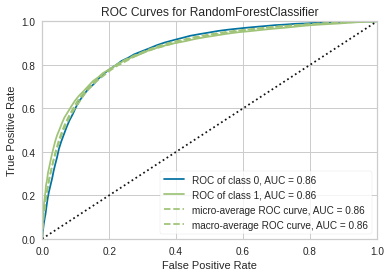

In [ ]:
classification.plot_model(best_model)

In [ ]:
preds2 = classification.predict_model(best_model,data=X_train_SMOTE[80000:85000].drop(columns=['Loan Status']))

In [ ]:
preds2['ans']=np.where(preds2['Label']==0,1-preds2['Score'],preds2['Score'])

In [ ]:
log_loss(X_train_SMOTE[80000:85000]['Loan Status'],preds2.Label)

7.7160608371874755

In [ ]:
log_loss(X_train_SMOTE[80000:85000]['Loan Status'],preds2.ans)

0.5430781675892291

In [ ]:
testdf2=prepare(testdf)

In [ ]:
for col in ordinal:
    testdf2[col] = di[col].inverse_transform(testdf2[col])

In [ ]:
preds = classification.predict_model(best_model,data=testdf2.drop(columns='Loan Status'))

In [ ]:
preds['ans']=np.where(preds['Label']==0,1-preds['Score'],preds['Score'])

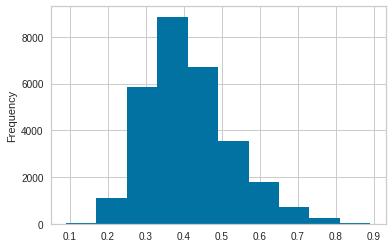

In [ ]:
preds.ans.plot(kind='hist')